In [1]:
import gempy as gp
#importing additional libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\tgluz\anaconda3\envs\clone_carlos_gp\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


No module named 'osgeo'
Not subsurface compatibility available


WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
#setting options
np.random.seed(1515)
pd.set_option('precision',2)

geo_model = gp.create_model('Fault_model')


data_path ='C:/RWTH_Aachen/thesis/GemPy_Model_from_Andrea/mod3/fault_angle_test/angles/'

In [3]:
# Importing the function to find the interface
from gempy.utils.input_manipulation import find_interfaces_from_block_bottoms


In [4]:
#importing the data from csv files and setting extent and resolution

#put dimentions of your model and x y z limits
gp.init_data(geo_model, [202000, 218000., 378000, 392000., 0, 2500.], [100, 100, 50],             
             path_o=data_path + "orientations_sf_rev65.csv",
             path_i=data_path + "model_points_sf_rev3.csv",
             default_values=True)

Active grids: ['regular']


Fault_model  2023-08-01 16:29

In [5]:
#Series derived from seismic interpretation divided into 3 main groups; 
# tertiary and younger sediments 
# middle section between tertiary and top of the Massenkalk - Top Devonian
# Massenkalk - layer of geothermal interest, Base Devonian 
#name convention followed from seismic interpretation by Phillip Ruebach @RWTH
#anything below considered basement

In [6]:
#Assigning densities to the layers 
geo_model.add_surface_values([0, 
                              0, 
                              2.2,  
                              2.7,
                              2.5,
                              3.5,
                              2.2,
                              2.7,
                              2.5,
                              3.5,], ['value_0'])

,surface,series,order_surfaces,color,id,value_0
0,Viersen_Fault,Default series,1,#015482,1,0.00
1,Viersen_Div1,Default series,2,#9f0052,2,0.00
2,Base_TertiaryE,Default series,3,#ffbe00,3,2.20
3,Top_DevonianE,Default series,4,#728f02,4,2.70
4,Base_DevonianE,Default series,5,#443988,5,2.50
5,BasementE,Default series,6,#ff3f20,6,3.50
6,Base_TertiaryW,Default series,7,#5DA629,7,2.20
7,Top_DevonianW,Default series,8,#4878d0,8,2.70
8,Base_DevonianW,Default series,9,#ee854a,9,2.50
9,basement,Basement,1,#6acc64,10,3.50


In [7]:
#setting the order of the formations and locations - geol sequence
gp.get_data(geo_model, 'surface_points').head()




,X,Y,Z,smooth,surface
0,214040,378350,880,2.00e-06,Viersen_Fault
1,215330,378820,2080,2.00e-06,Viersen_Fault
2,215600,378900,2490,2.00e-06,Viersen_Fault
3,214000,381050,1290,2.00e-06,Viersen_Fault
4,214400,382650,2160,2.00e-06,Viersen_Fault


In [8]:
gp.get_data(geo_model, 'orientations').head()

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,212510,386180,1100,-9.06e-01,1.00e-12,0.42,0.01,Viersen_Fault
1,213250,383600,1195,-9.06e-01,1.00e-12,0.42,0.01,Viersen_Div1
2,216000,391000,2260,1.00e-12,1.00e-12,1.00,0.01,Base_TertiaryE
3,215160,386980,1820,1.00e-12,1.00e-12,1.00,0.01,Top_DevonianE
4,215160,386980,1420,1.00e-12,1.00e-12,1.00,0.01,Base_DevonianE


In [9]:
geo_model.faults.faults_relations_df

,Default series,Basement
Default series,False,False
Basement,False,False


In [10]:
geo_model.surfaces

,surface,series,order_surfaces,color,id,value_0
0,Viersen_Fault,Default series,1,#015482,1,0.00
1,Viersen_Div1,Default series,2,#9f0052,2,0.00
2,Base_TertiaryE,Default series,3,#ffbe00,3,2.20
3,Top_DevonianE,Default series,4,#728f02,4,2.70
4,Base_DevonianE,Default series,5,#443988,5,2.50
5,BasementE,Default series,6,#ff3f20,6,3.50
6,Base_TertiaryW,Default series,7,#5DA629,7,2.20
7,Top_DevonianW,Default series,8,#4878d0,8,2.70
8,Base_DevonianW,Default series,9,#ee854a,9,2.50
9,basement,Basement,1,#6acc64,10,3.50


In [11]:
gp.map_stack_to_surfaces(geo_model,
                         {"Fault_Series": 'Viersen_Fault',
                          "Fault_Series2": 'Viersen_Div1',
                          "Strat_Series": ('Base_TertiaryE', 'Top_DevonianE','Base_DevonianE', 'BasementE',
                                           'Base_TertiaryW', 'Top_DevonianW','Base_DevonianW', )},
                         remove_unused_series=True)

,surface,series,order_surfaces,color,id,value_0
0,Viersen_Fault,Fault_Series,1,#015482,1,0.00
1,Viersen_Div1,Fault_Series2,1,#9f0052,2,0.00
2,Base_TertiaryE,Strat_Series,1,#ffbe00,3,2.20
3,Top_DevonianE,Strat_Series,2,#728f02,4,2.70
4,Base_DevonianE,Strat_Series,3,#443988,5,2.50
5,BasementE,Strat_Series,4,#ff3f20,6,3.50
6,Base_TertiaryW,Strat_Series,5,#5DA629,7,2.20
7,Top_DevonianW,Strat_Series,6,#4878d0,8,2.70
8,Base_DevonianW,Strat_Series,7,#ee854a,9,2.50
9,basement,Basement,1,#6acc64,10,3.50


In [12]:
color_dict = {'Viersen_Fault': '#015482', 'Viersen_Div1': '#015482', 
              'Base_TertiaryE': '#ffbe00', 'Base_TertiaryW': '#ffbe00', 
              'Top_DevonianE': '#728f02', 'Top_DevonianW': '#728f02',
              'Base_DevonianE': '#4878d0', 'Base_DevonianW': '#4878d0',
              'BasementE': '#ff3f20', 'basement': '#ff3f20'
             }
# then change colors of your geo_model by:
geo_model.surfaces.colors.change_colors(colordict=color_dict)

In [13]:
geo_model.surfaces

,surface,series,order_surfaces,color,id,value_0
0,Viersen_Fault,Fault_Series,1,#015482,1,0.00
1,Viersen_Div1,Fault_Series2,1,#015482,2,0.00
2,Base_TertiaryE,Strat_Series,1,#ffbe00,3,2.20
3,Top_DevonianE,Strat_Series,2,#728f02,4,2.70
4,Base_DevonianE,Strat_Series,3,#4878d0,5,2.50
5,BasementE,Strat_Series,4,#ff3f20,6,3.50
6,Base_TertiaryW,Strat_Series,5,#ffbe00,7,2.20
7,Top_DevonianW,Strat_Series,6,#728f02,8,2.70
8,Base_DevonianW,Strat_Series,7,#4878d0,9,2.50
9,basement,Basement,1,#ff3f20,10,3.50


In [14]:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Erosion,True,False,False
Fault_Series2,2,Erosion,True,False,False
Strat_Series,3,Erosion,True,False,False
Basement,4,Erosion,False,False,False


In [15]:
geo_model.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Fault,True,True,False
Fault_Series2,2,Erosion,True,False,False
Strat_Series,3,Erosion,True,False,False
Basement,4,Erosion,False,False,False


In [16]:
geo_model.set_is_fault(['Fault_Series2'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Fault,True,True,False
Fault_Series2,2,Fault,True,True,False
Strat_Series,3,Erosion,True,False,False
Basement,4,Erosion,False,False,False


In [17]:
geo_model.faults.faults_relations_df

,Fault_Series,Fault_Series2,Strat_Series,Basement
Fault_Series,False,False,True,True
Fault_Series2,False,False,True,True
Strat_Series,False,False,False,False
Basement,False,False,False,False


In [18]:
#now geomodel contains important info, returning info from the input data
geo_model.grid

gp.get_data(geo_model, 'surface_points').head()



,X,Y,Z,smooth,surface
0,214040,378350,880,2.00e-06,Viersen_Fault
1,215330,378820,2080,2.00e-06,Viersen_Fault
2,215600,378900,2490,2.00e-06,Viersen_Fault
3,214000,381050,1290,2.00e-06,Viersen_Fault
4,214400,382650,2160,2.00e-06,Viersen_Fault


In [19]:
gp.get_data(geo_model, 'orientations')

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,212510,386180,1100,-9.06e-01,1.00e-12,0.42,0.01,Viersen_Fault
1,213250,383600,1195,-9.06e-01,1.00e-12,0.42,0.01,Viersen_Div1
2,216000,391000,2260,1.00e-12,1.00e-12,1.00,0.01,Base_TertiaryE
3,215160,386980,1820,1.00e-12,1.00e-12,1.00,0.01,Top_DevonianE
4,215160,386980,1420,1.00e-12,1.00e-12,1.00,0.01,Base_DevonianE
5,217000,385000,0,1.00e-12,1.00e-12,1.00,0.01,BasementE
6,209000,387000,1800,1.00e-12,1.00e-12,1.00,0.01,Base_TertiaryW
7,206000,379000,800,1.00e-12,1.00e-12,1.00,0.01,Top_DevonianW
8,206000,379000,400,1.00e-12,1.00e-12,1.00,0.01,Base_DevonianW


C:\Users\tgluz\anaconda3\envs\clone_carlos_gp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


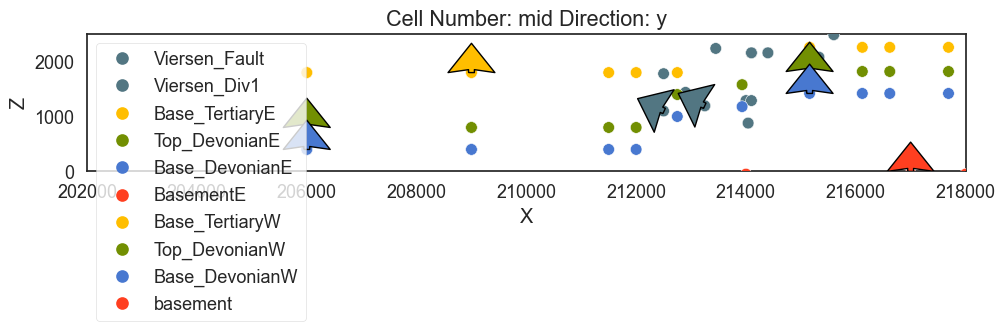

In [20]:
#visualising input data
plot = gp.plot_2d(geo_model, show_lith=False, show_boundaries=False, )
plt.show()



In [21]:
gpv = gp.plot_3d(geo_model, image=False,  plotter_type='basic', )

C:\Users\tgluz\anaconda3\envs\clone_carlos_gp\lib\site-packages\pyvista\utilities\helpers.py:476: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  'Points is not a float type. This can cause issues when '


In [22]:
#Model generation
gp.set_interpolator(geo_model,
                    comlile_theano=True,
                    theano_optimizer='fast_compile',)

gp.get_data(geo_model, 'kriging')

sol = gp.compute_model(geo_model)

sol

geo_model.solutions

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  2
Compilation Done!
Kriging values: 
                        values
range                21406.77
$C_o$             10910714.29
drift equations  [3, 3, 3, 3]



Lithology ids 
  [10. 10. 10. ...  3.  3.  3.] 

In [23]:
#Direct visualisation in GemPy
#lithology block
#gp.plot_2d(geo_model, cell_number=25,show_data=True)
#plt.show()
#lithological scalar-field solution -> fold related deformation
#gp.plot_2d(geo_model, show_data=False, show_scalar=True, show_lith=False)
#plt.show()

#fold related deformation on stratigraphy
#gp.plot_2d(geo_model, series_n=1, show_data=False, show_scalar=True, show_lith=False)
#plt.show()

#fault network modelling
#geo_model.solutions.scalar_field_at_surface_points

##gp.plot_2d(geo_model, show_block=True, show_lith=False)
#plt.show()

#gp.plot_2d(geo_model, series_n=1, show_block=True, show_lith=False)
#plt.show()

In [24]:
#3D visualisation with cubes
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

C:\Users\tgluz\anaconda3\envs\clone_carlos_gp\lib\site-packages\pyvista\plotting\tools.py:573: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  PyvistaDeprecationWarning,
C:\Users\tgluz\anaconda3\envs\clone_carlos_gp\lib\site-packages\pyvista\utilities\helpers.py:476: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  'Points is not a float type. This can cause issues when '


In [25]:
#Adding topography NEED TO IMPLEMENT DTM
#geo_model.set_topography(d_z=(350,750))

#gp.compute_model(geo_model)
#gp.plot_2d(geo_model, show_topography=True)
#plt.show()


In [26]:
# sphinx_gallery_thumbnail_number = 9
gpv = gp.plot_3d(geo_model, plotter_type='basic', show_topography=True, show_surfaces=True,
                 show_lith=True,
                 image=False)

In [220]:
#returning the id at the scalar field values
x_i = np.array([3, 5, 6])

sol = gp.compute_model(geo_model, at=x_i)

sol.custom

Active grids: ['custom']


C:\Users\tgluz\.conda\envs\model_gem\lib\site-packages\gempy\core\solution.py:175: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.custom = np.array(


array([array([[7. ],
              [2.2]]), array([[11.24032893],
                              [ 8.359418  ],
                              [49.67313376]])], dtype=object)

In [221]:
#save the model!

gp.save_model(geo_model)

True